## Model description

This is a simple two-dimensional model that describes a 2D ellipse in phase space.

The system is defined by the following ODEs

$$
\left\{ \begin{array}{lc;} x'(t) & = & 3x - 9y \\ y'(t) & = & 4x-3y \end{array}   \right. 
$$

In [1]:
using Reachability, MathematicalSystems, SparseArrays

In [2]:
A = [3.0 -9.0;
     4.0 -3.0]

2×2 Array{Float64,2}:
 3.0  -9.0
 4.0  -3.0

In [3]:
S = LinearContinuousSystem(A)

LinearContinuousSystem{Float64,Array{Float64,2}}([3.0 -9.0; 4.0 -3.0])

## Reachability settings

We consider three initial initial sets:

- A small box around the points $[1.0, 0.0]$ of radius $0.01$.
- A small box around the points $[1.5, 0.0]$ of radius $0.02$.
- A convex combination of the previous two sets.

In [4]:
X0₁ = Singleton([1.0, 0.0]) ⊕ BallInf(zeros(2), 0.01)
X0₂ = Singleton([1.5, 0.0]) ⊕ BallInf(zeros(2), 0.02)

α = 0.8
Z0 = α * X0₁ + (1-α) * X0₂;

In [5]:
using Plots

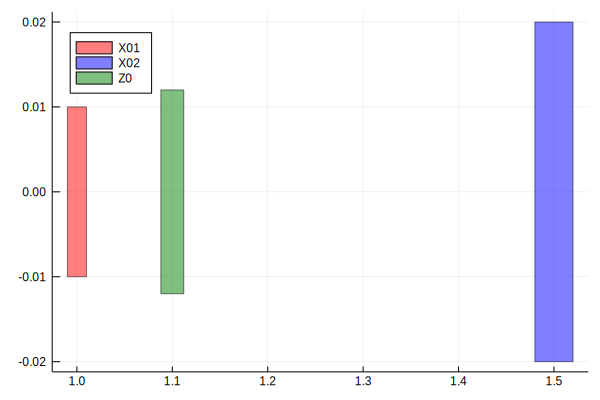

In [6]:
plot(X0₁, lab="X01", color="red")
plot!(X0₂, lab="X02", color="blue")
plot!(Z0, lab="Z0", color="green", legend=:topleft)

## Results

In [7]:
using Plots

In [11]:
X0₁ = overapproximate(X0₁, Hyperrectangle) # can be removed after Reachability#713
P1 = InitialValueProblem(S, X0₁)
sol1 = solve(P1, Options(:T=>2.0), op=GLGM06(:δ=>0.05));

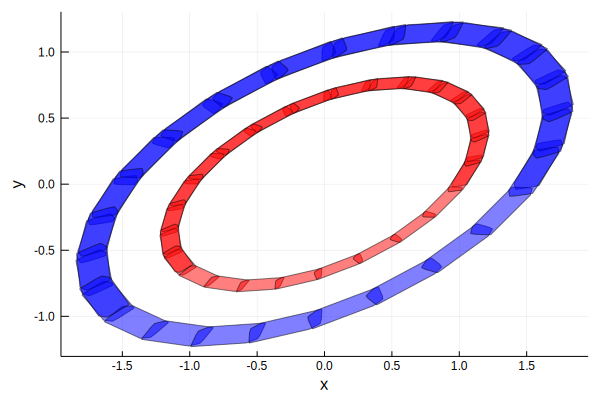

In [12]:
X0₂ = overapproximate(X0₂, Hyperrectangle) # can be removed after Reachability#713
P2 = InitialValueProblem(S, X0₂)
sol2 = solve(P2, Options(:T=>2.0), op=GLGM06(:δ=>0.05))

plot([set(x) for x in sol1.Xk], color="red", xlab="x", ylab="y")
plot!([set(x) for x in sol2.Xk], color="blue")

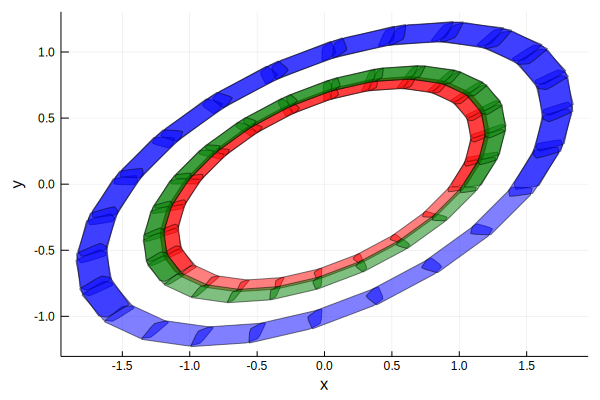

In [13]:
Z0 = overapproximate(Z0, Hyperrectangle) # can be removed after Reachability#713
P3 = InitialValueProblem(S, Z0)
sol3 = solve(P3, Options(:T=>2.0), op=GLGM06(:δ=>0.05))

plot!([set(x) for x in sol3.Xk], color="green")